# Data Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as snb

In [2]:
dataset = pd.read_csv("carbon_nanotubes.csv",sep=';',engine='python',thousands=",")

In [3]:
dataset.head()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,679005,701318,17033,721039,730232,17014
1,2,1,717298,642129,231319,738414,65675,232369
2,2,1,489336,303751,88462,477676,263221,88712
3,2,1,413957,632996,40843,408823,657897,39796
4,2,1,334292,543401,15989,303349,558807,157373


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10721 entries, 0 to 10720
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Chiral indice n                   10721 non-null  int64
 1   Chiral indice m                   10721 non-null  int64
 2   Initial atomic coordinate u       10721 non-null  int64
 3   Initial atomic coordinate v       10721 non-null  int64
 4   Initial atomic coordinate w       10721 non-null  int64
 5   Calculated atomic coordinates u'  10721 non-null  int64
 6   Calculated atomic coordinates v'  10721 non-null  int64
 7   Calculated atomic coordinates w'  10721 non-null  int64
dtypes: int64(8)
memory usage: 670.2 KB


In [5]:
X = dataset.iloc[:, :5].values
y = dataset.iloc[:, 5:8].values

In [6]:
dataset.corr()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
Chiral indice n,1.000000,-0.001994,0.003194,-0.011677,-0.002823,0.016052,0.005005,-0.005349
Chiral indice m,-0.001994,1.000000,0.013356,0.007843,0.001127,0.017149,0.004639,0.010200
Initial atomic coordinate u,0.003194,0.013356,1.000000,0.375245,0.001835,0.739259,0.376004,0.006516
Initial atomic coordinate v,-0.011677,0.007843,0.375245,1.000000,-0.007607,0.375616,0.743684,-0.003018
Initial atomic coordinate w,-0.002823,0.001127,0.001835,-0.007607,1.000000,-0.000577,0.000222,0.729369
Calculated atomic coordinates u',0.016052,0.017149,0.739259,0.375616,-0.000577,1.000000,0.374291,-0.001568
Calculated atomic coordinates v',0.005005,0.004639,0.376004,0.743684,0.000222,0.374291,1.000000,-0.002917
Calculated atomic coordinates w',-0.005349,0.010200,0.006516,-0.003018,0.729369,-0.001568,-0.002917,1.000000


In [23]:
dataset.describe()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
count,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000
mean,8.225725,3.337189,454784.941610,454988.835556,454033.984330,454798.147654,456266.137114,453052.988620
std,2.138919,1.683881,304380.714928,304358.377385,305605.951651,308013.491572,308387.137917,306861.413361
min,2.000000,1.000000,158.000000,225.000000,52.000000,32.000000,225.000000,0.000000
25%,7.000000,2.000000,156502.000000,157965.000000,166728.000000,150393.000000,151589.000000,164284.000000
50%,8.000000,3.000000,431087.000000,427737.000000,444445.000000,430111.000000,429792.000000,442666.000000
75%,10.000000,5.000000,756414.000000,757776.000000,720355.000000,759154.000000,765037.000000,720787.000000
max,12.000000,6.000000,954851.000000,954851.000000,999411.000000,961496.000000,960959.000000,999611.000000


<AxesSubplot:>

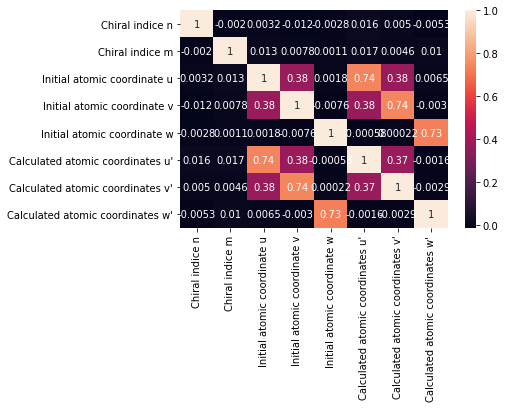

In [7]:
snb.heatmap(dataset.corr(),annot=True,fmt=".2g")

# Data Splitting

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred = lin_regressor.predict(X_test)

In [11]:
lin_regressor.predict([[8,5,789606,90759,924299]])

array([[645867.02769922, 232948.27235688, 804553.30640149]])

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5548830954871101

# Polynomial Regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lin_regressor2 = LinearRegression()
lin_regressor2.fit(X_poly, y_train)

LinearRegression()

In [14]:
y_pred2 = lin_regressor2.predict(poly_reg.fit_transform(X_test))

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred2)

0.6167686102173328

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor
des_tree = DecisionTreeRegressor(min_samples_leaf=30,random_state=0)
des_tree.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=30, random_state=0)

In [17]:
y_pred3 = des_tree.predict(X_test)

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred3)

0.6192389027413043

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor(n_estimators=25,min_samples_leaf=30,random_state=0)
ran_for.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=30, n_estimators=25, random_state=0)

In [20]:
y_pred4 = ran_for.predict(X_test)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred4)

0.6365957580779129

### As we can see by applying different
### Regression models random forest works
### the best in this case